Based on dataset, we are interested to know:

- Q1: Does having a higher budget results in a higher revenue and profit?
- Q2: Which genres are associated with high popularity?
- Q3: Which production company produces the highest revenue movies?
- Q4: Which year produced movies with highest grossing revenue?
- Q5: Which movie is associated with highest revenue?

### Preparing the Environment

In [297]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import CSV
df = pd.read_csv('C:/Users/RUCHITA/Documents/Downloads/tmdb_5000_movies.csv')

In [298]:
# View records
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [299]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [300]:
# Check for duplicates
df.duplicated().sum()

0

In [301]:
# Find percentage of null values
df.isnull().sum()/len(df)*100

budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title                    0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64

In [302]:
# Drop columns
df.drop(['id','homepage','tagline'], axis=1, inplace=True)

# Confirm that colummns are dropped
df.head()

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


### Create "profit" and "profit margin" field 

In [303]:
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit']/df['revenue']*100

### Exploratory Data Analysis

### Q1: Does a higher budget results in higher revenue and profit?

In [304]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,profit,profit_margin
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4.803000e+03,3913.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989,5.321560e+07,-inf
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,1.359677e+08,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,-inf
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000,-7.995375e+05,-83.333333
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2.511317e+06,49.975327
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000,5.531286e+07,76.887764
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,100.000000


We observed something strange here. 
At least 50% of revenue are 0. And, if you look at profit column, there is a negative profit in the min row and same situation as revenue, half of it are recording $0 profit.

Looking at the new column profit_margin, only 6,164 rows (57%) have profit margins which means the remaining rows have either a $0 in budget or revenue.

We will create a subset where budget is more than 0.

In [305]:
budget = df.query('budget > 0')
budget.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,profit,profit_margin
count,3.766000e+03,3766.000000,3.766000e+03,3764.000000,3766.000000,3766.000000,3.766000e+03,3766.000000
mean,3.704284e+07,25.984641,1.039547e+08,109.324389,6.226474,856.496814,6.691189e+07,-inf
std,4.264651e+07,34.438253,1.776399e+08,20.753408,0.966228,1344.785690,1.503957e+08,NaN
min,1.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,-inf
25%,8.000000e+06,7.974990,6.009736e+06,95.000000,5.700000,114.000000,-4.000000e+06,-103.674947
50%,2.300000e+07,17.604955,3.883137e+07,105.500000,6.300000,365.500000,1.431553e+07,46.453399
75%,5.000000e+07,33.925801,1.220873e+08,120.000000,6.900000,969.250000,7.858474e+07,74.628456
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,99.999988


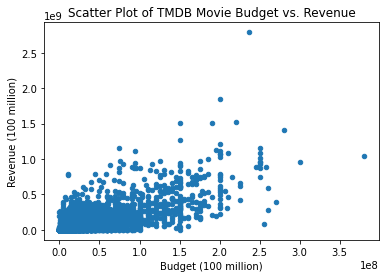

In [306]:
# Budget vs Revenue
budget.plot(y='revenue',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Revenue (100 million)");

In general, movies with a higher budget results in a higher revenue.

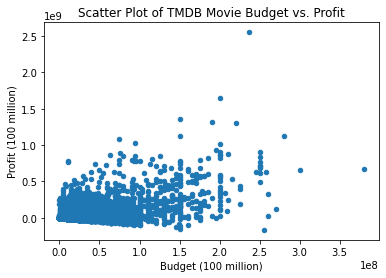

In [307]:
# Budget vs Profit
budget.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (100 million)")
plt.ylabel("Profit (100 million)");

In general, movies with a higher budget results in a higher profit.

Now, according to an artcile, 
The average cost to produce a major studio movie has been around USD 65 million. But the production costs don't cover distribution and marketing, which adds another USD 35 million or so, on average, bringing the total cost to produce and market a major movie to right about USD 100 million.

We will filter for budgets with USD 100 million and more.

In [308]:
blockbuster = budget.query('budget > 1.000000e+08')
blockbuster.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,profit,profit_margin
count,2.790000e+02,279.000000,2.790000e+02,279.000000,279.000000,279.000000,2.790000e+02,279.000000
mean,1.550914e+08,73.179527,4.843548e+08,121.688172,6.388172,3178.043011,3.292634e+08,-inf
std,4.147266e+07,68.963893,3.362338e+08,22.715306,0.752289,2385.123715,3.184821e+08,NaN
min,1.020000e+08,2.871739,0.000000e+00,76.000000,4.100000,106.000000,-1.657101e+08,-inf
25%,1.250000e+08,39.809016,2.630743e+08,103.000000,5.900000,1427.000000,1.199098e+08,46.140559
50%,1.500000e+08,58.485967,3.910812e+08,120.000000,6.400000,2487.000000,2.432589e+08,63.689722
75%,1.750000e+08,88.142983,6.507519e+08,137.500000,6.900000,4425.000000,4.995002e+08,75.962216
max,3.800000e+08,724.247784,2.787965e+09,194.000000,8.200000,13752.000000,2.550965e+09,91.499176


In [309]:
blockbuster.shape

(279, 19)

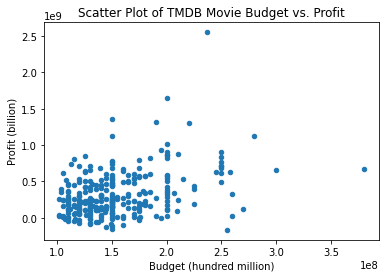

In [310]:
blockbuster.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (hundred million)")
plt.ylabel("Profit (billion)");

### Top 10 movies with highest budget.

In [311]:
# Groupby Movie Title and Budget, Revenue and Profit for Top 10 Movies
blockbuster_grouped = blockbuster.groupby('original_title')[['budget','revenue','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
blockbuster_grouped

,budget,revenue,profit
original_title,,,
Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802
Pirates of the Caribbean: At World's End,300000000,961000000,661000000
Avengers: Age of Ultron,280000000,1405403694,1125403694
Superman Returns,270000000,391081192,121081192
John Carter,260000000,284139100,24139100
Tangled,260000000,591794936,331794936
Spider-Man 3,258000000,890871626,632871626
The Lone Ranger,255000000,89289910,-165710090
Harry Potter and the Half-Blood Prince,250000000,933959197,683959197


### Q2. Which genres are associated with high popularity?

On TMDB website, the popularity metric is calculated based on Movies, TV Shows and People where it measures the number of votes and views, and number of users who marked it as their "favourite" or added into their "watchlist".

Source: https://developers.themoviedb.org/3/getting-started/popularity

In [312]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [313]:
import ast
def convert(obj):
    li=[]
    for i in ast.literal_eval(obj):
        li.append(i['name'])
    return li

In [314]:
df['genres']=df['genres'].apply(convert)
df['genres'][0:6]

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
5                     [Fantasy, Action, Adventure]
Name: genres, dtype: object

In [315]:
genre = df.explode('genres')
genre.head(3)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit,profit_margin
0,237000000,Action,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,91.499176
0,237000000,Adventure,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,91.499176
0,237000000,Fantasy,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,91.499176


In [316]:
genre['genres'].value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genres, dtype: int64

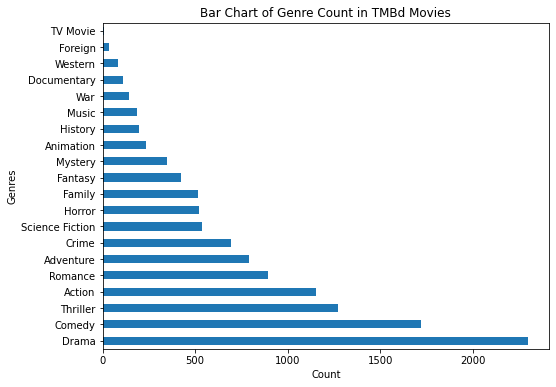

In [317]:
plt.figure(figsize=[8,6])
genre['genres'].value_counts().plot.barh()
plt.title("Bar Chart of Genre Count in TMBd Movies")
plt.ylabel("Genres")
plt.xlabel("Count");

Highest count of genres are Drama, Comedy and Thriller. 

Does it mean that they're most popular?

In [318]:
df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [319]:
#Let's get the average popularity and use it as our benchmark.

df['popularity'].mean()

21.49230058817409

In [320]:
genre_mean = genre.groupby('genres')[['popularity','revenue','profit']].mean().sort_values('popularity', ascending=False)
genre_mean.iloc[:10,:].query("popularity > 21.49230058817409")

,popularity,revenue,profit
genres,,,
Adventure,39.268042,2.086602e+08,1.423333e+08
Animation,38.813439,2.256930e+08,1.592271e+08
Science Fiction,36.451806,1.524565e+08,1.005910e+08
Fantasy,36.387043,1.933542e+08,1.297936e+08
Action,30.940382,1.412131e+08,8.970235e+07
Family,27.832849,1.623455e+08,1.116260e+08
Mystery,24.586827,7.830093e+07,4.755644e+07
Thriller,24.460077,8.104429e+07,4.907608e+07
War,23.777289,8.415587e+07,4.887342e+07


Adventure, animation and Science Fiction are the most popular geners.

### Q3: Which production company produces the highest revenue movies?

In [321]:
df.production_companies

0       [{"name": "Ingenious Film Partners", "id": 289...
1       [{"name": "Walt Disney Pictures", "id": 2}, {"...
2       [{"name": "Columbia Pictures", "id": 5}, {"nam...
3       [{"name": "Legendary Pictures", "id": 923}, {"...
4             [{"name": "Walt Disney Pictures", "id": 2}]
                              ...                        
4798             [{"name": "Columbia Pictures", "id": 5}]
4799                                                   []
4800    [{"name": "Front Street Pictures", "id": 3958}...
4801                                                   []
4802    [{"name": "rusty bear entertainment", "id": 87...
Name: production_companies, Length: 4803, dtype: object

In [322]:
df['production_companies']=df['production_companies'].apply(convert)
df['production_companies']

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4798                                  [Columbia Pictures]
4799                                                   []
4800    [Front Street Pictures, Muse Entertainment Ent...
4801                                                   []
4802         [rusty bear entertainment, lucky crow films]
Name: production_companies, Length: 4803, dtype: object

In [323]:
production_companies_df = df.explode('production_companies')
production_companies_df.head(3)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit,profit_margin
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,91.499176
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Twentieth Century Fox Film Corporation,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,91.499176
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Dune Entertainment,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,91.499176


In [324]:
production_companies_df['production_companies'].value_counts()

Warner Bros.                                            319
Universal Pictures                                      311
Paramount Pictures                                      285
Twentieth Century Fox Film Corporation                  222
Columbia Pictures                                       201
                                                       ... 
B24                                                       1
Cinelamda Internationale Filmproduktionsgesellschaft      1
Animation Picture Company                                 1
Mitteldeutsche Medienförderung (MDM)                      1
BN Films                                                  1
Name: production_companies, Length: 5017, dtype: int64

In [329]:
production_companies_df.groupby('production_companies')[['revenue','profit']].mean().sort_values('revenue', ascending=False).head(5)

,revenue,profit
production_companies,,
Abu Dhabi Film Commission,1.506249e+09,1.316249e+09
"Colorado Office of Film, Television & Media",1.506249e+09,1.316249e+09
Québec Production Services Tax Credit,1.506249e+09,1.316249e+09
Prime Focus,1.405404e+09,1.125404e+09
Vita-Ray Dutch Productions (III),1.153304e+09,9.033045e+08


In [326]:
production_companies_df.groupby('production_companies')[['revenue','profit']].mean().sort_values('profit', ascending=False).head(5)

,revenue,profit
production_companies,,
"Colorado Office of Film, Television & Media",1.506249e+09,1.316249e+09
Abu Dhabi Film Commission,1.506249e+09,1.316249e+09
Québec Production Services Tax Credit,1.506249e+09,1.316249e+09
Prime Focus,1.405404e+09,1.125404e+09
Lightstorm Entertainment,1.124376e+09,9.799764e+08


Abu Dhabi Film Commission, Colorado Office of Film, Television & Media and Québec Production Services Tax Credit is the most revenuable production company

### Q4. Most profitable movie 

In [337]:
profitable_movie=production_companies_df.query('production_companies == "Colorado Office of Film, Television & Media" ').sort_values('profit', ascending=False)
profitable_movie["title"]

44    Furious 7
Name: title, dtype: object

### Q5: Which year produced movies with highest grossing revenue?

In [332]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'profit', 'profit_margin'],
      dtype='object')

In [371]:
import datetime

df['release_date'] = pd.to_datetime(df['release_date'], errors ='coerce')
df['year']= df['release_date'].dt.strftime('%Y')

In [372]:
df['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4803, dtype: object

In [400]:
df.groupby('year')[['revenue']].sum().sort_values('revenue', ascending=False).head(5)

,revenue
year,
2012,24141710246
2014,24120490589
2013,23411493295
2015,22775024221
2009,21072651506


In [404]:
profitable_year=df.query('year == "2012"').sort_values('revenue', ascending=False)
profitable_year['title']

16                           The Avengers
29                                Skyfall
3                   The Dark Knight Rises
98      The Hobbit: An Unexpected Journey
325            Ice Age: Continental Drift
                      ...                
2677                           Good Deeds
4304                       Blue Like Jazz
4314                            Crowsnest
2500                                Vamps
4801                     Shanghai Calling
Name: title, Length: 208, dtype: object

In [402]:
df.sort_values('revenue', ascending = False)[['title', 'year']]

,title,year
0,Avatar,2009
25,Titanic,1997
16,The Avengers,2012
28,Jurassic World,2015
44,Furious 7,2015
...,...,...
3200,The Girl on the Train,2009
3199,Red Riding: In the Year of Our Lord 1974,2009
3197,Flame & Citron,2008
3194,All or Nothing,2002
